# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib as plt

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [3]:
#your code here
spaceship.shape

(8693, 14)

**Check for data types**

In [4]:
#your code here
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Check for missing values**

In [5]:
#your code here
spaceship.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [6]:
#your code here
spaceship_cleaned = spaceship.dropna()

In [7]:
spaceship_cleaned.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [8]:
#your code here

# Transformar la columna "Cabin"
spaceship_cleaned['Cabin'] = spaceship_cleaned['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'Unknown')

# Mostrar el DataFrame transformado
print("\nDataFrame transformado:")
print(spaceship_cleaned)


DataFrame transformado:
     PassengerId HomePlanet CryoSleep Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F    TRAPPIST-1e  16.0  False   
...          ...        ...       ...   ...            ...   ...    ...   
8688     9276_01     Europa     False     A    55 Cancri e  41.0   True   
8689     9278_01      Earth      True     G  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False     G    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False     E    55 Cancri e  32.0  False   
8692     9280_02     Europa     False     E    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               N

C:\Users\evacv\AppData\Local\Temp\ipykernel_1524\2731958165.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spaceship_cleaned['Cabin'] = spaceship_cleaned['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'Unknown')


- Drop PassengerId and Name

In [9]:
#your code here
spaceship_cleaned = spaceship_cleaned.drop(columns=['PassengerId', 'Name'])

- For non-numerical columns, do dummies.

In [10]:
#your code here
spaceship_cleaned = pd.get_dummies(spaceship_cleaned, columns=spaceship_cleaned.select_dtypes(include=['object']).columns)
spaceship_cleaned

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,True,True,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True,True,False,False,...,False,False,True,False,False,False,False,True,True,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,False,True,False,...,False,False,False,False,False,False,False,True,True,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True,True,False,False,...,False,False,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,...,False,False,False,True,False,False,True,False,True,False
8690,26.0,0.0,0.0,1872.0,1.0,0.0,True,True,False,False,...,False,False,False,True,False,False,False,True,True,False
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False


In [11]:
numerical_spaceship = spaceship_cleaned.select_dtypes(include=['float64','bool'])
numerical_spaceship

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,True,True,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True,True,False,False,...,False,False,True,False,False,False,False,True,True,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,False,True,False,...,False,False,False,False,False,False,False,True,True,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True,True,False,False,...,False,False,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,...,False,False,False,True,False,False,True,False,True,False
8690,26.0,0.0,0.0,1872.0,1.0,0.0,True,True,False,False,...,False,False,False,True,False,False,False,True,True,False
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False


**Perform Train Test Split**

In [12]:
spaceship_numerical = spaceship_cleaned.select_dtypes(include=['float64','bool'])

# Imprimir el DataFrame solo con columnas numéricas
print(spaceship_numerical)

       Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Transported  \
0     39.0          0.0        0.0           0.0     0.0     0.0        False   
1     24.0        109.0        9.0          25.0   549.0    44.0         True   
2     58.0         43.0     3576.0           0.0  6715.0    49.0        False   
3     33.0          0.0     1283.0         371.0  3329.0   193.0        False   
4     16.0        303.0       70.0         151.0   565.0     2.0         True   
...    ...          ...        ...           ...     ...     ...          ...   
8688  41.0          0.0     6819.0           0.0  1643.0    74.0        False   
8689  18.0          0.0        0.0           0.0     0.0     0.0        False   
8690  26.0          0.0        0.0        1872.0     1.0     0.0         True   
8691  32.0          0.0     1049.0           0.0   353.0  3235.0        False   
8692  44.0        126.0     4688.0           0.0     0.0    12.0         True   

      HomePlanet_Earth  Hom

In [13]:
spaceship_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        6606 non-null   float64
 1   RoomService                6606 non-null   float64
 2   FoodCourt                  6606 non-null   float64
 3   ShoppingMall               6606 non-null   float64
 4   Spa                        6606 non-null   float64
 5   VRDeck                     6606 non-null   float64
 6   Transported                6606 non-null   bool   
 7   HomePlanet_Earth           6606 non-null   bool   
 8   HomePlanet_Europa          6606 non-null   bool   
 9   HomePlanet_Mars            6606 non-null   bool   
 10  CryoSleep_False            6606 non-null   bool   
 11  CryoSleep_True             6606 non-null   bool   
 12  Cabin_A                    6606 non-null   bool   
 13  Cabin_B                    6606 non-null   bool   
 1

In [14]:
features = spaceship_numerical
print("\nCaracterísticas (features):")
print(features.head())


Características (features):
    Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Transported  \
0  39.0          0.0        0.0           0.0     0.0     0.0        False   
1  24.0        109.0        9.0          25.0   549.0    44.0         True   
2  58.0         43.0     3576.0           0.0  6715.0    49.0        False   
3  33.0          0.0     1283.0         371.0  3329.0   193.0        False   
4  16.0        303.0       70.0         151.0   565.0     2.0         True   

   HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  ...  Cabin_D  \
0             False               True            False  ...    False   
1              True              False            False  ...    False   
2             False               True            False  ...    False   
3             False               True            False  ...    False   
4              True              False            False  ...    False   

   Cabin_E  Cabin_F  Cabin_G  Cabin_T  Destination_55 Cancri e 

In [15]:
target = spaceship_cleaned['Transported']
print("\nObjetivo (target):")
print(target.head())


Objetivo (target):
0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool


In [16]:
#your code here
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [17]:
#your code here

from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
pred = knn.predict(X_test)
pred

c:\Users\evacv\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\evacv\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


array([ True, False,  True, ...,  True,  True,  True])

In [21]:
from sklearn.metrics import accuracy_score

In [22]:

accuracy_score(y_test, pred)

0.8396369137670197

In [23]:
y_pred = knn.predict(X_test)

In [24]:
precision = precision_score(y_test, y_pred)
precision

0.8569157392686805

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (6606).

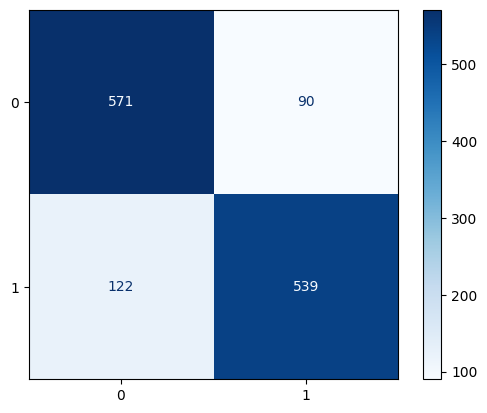

In [25]:


cm = confusion_matrix (y_test, pred)

#mostrar Matriz de 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=spaceship_cleaned['Transported'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

- Evaluate your model's performance. Comment it

In [ ]:
#your code here